# Butadien II
We will invetigate various Butadien configurations and train a network on it. The data will be solely pyscf generated this time.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

dim = 26

## Creating the dataset

In [2]:
from os import listdir
from os.path import join

from SCFInitialGuess.utilities import Molecule

def grep_molecule(input_file):
    import re
    
    with open(input_file) as f:
            
        molecule = re.search(r"\$molecule.*\$end", f.read(), re.DOTALL)
        if molecule is None:
            raise ValueError("No molecule found in " + f.name)
        else:
            molecule = molecule.group(0)

            # cut out geometries
            geometries = molecule.splitlines()[2:-1]

    # from geometries take the species and positions
    species, positions = [], []
    for line in geometries:
        splits = line.split()
        species.append(splits[0])
        positions.append(splits[1:])

    return species, positions

def fetch_molecules(folder):
    
    files = [file for file in listdir(folder) if ".inp" in file]
    
    for i, file in enumerate(files):
        
        print("Fetching: " + str(i + 1) + "/" + str(len(files)))

        mol = Molecule(*grep_molecule(join(folder, file)))
        
        mol.basis = "sto-3g"
        
        yield mol
        
        
molecules = list(fetch_molecules("butadien/data"))

Fetching: 1/200
Fetching: 2/200
Fetching: 3/200
Fetching: 4/200
Fetching: 5/200
Fetching: 6/200
Fetching: 7/200
Fetching: 8/200
Fetching: 9/200
Fetching: 10/200
Fetching: 11/200
Fetching: 12/200
Fetching: 13/200
Fetching: 14/200
Fetching: 15/200
Fetching: 16/200
Fetching: 17/200
Fetching: 18/200
Fetching: 19/200
Fetching: 20/200
Fetching: 21/200
Fetching: 22/200
Fetching: 23/200
Fetching: 24/200
Fetching: 25/200
Fetching: 26/200
Fetching: 27/200
Fetching: 28/200
Fetching: 29/200
Fetching: 30/200
Fetching: 31/200
Fetching: 32/200
Fetching: 33/200
Fetching: 34/200
Fetching: 35/200
Fetching: 36/200
Fetching: 37/200
Fetching: 38/200
Fetching: 39/200
Fetching: 40/200
Fetching: 41/200
Fetching: 42/200
Fetching: 43/200
Fetching: 44/200
Fetching: 45/200
Fetching: 46/200
Fetching: 47/200
Fetching: 48/200
Fetching: 49/200
Fetching: 50/200
Fetching: 51/200
Fetching: 52/200
Fetching: 53/200
Fetching: 54/200
Fetching: 55/200
Fetching: 56/200
Fetching: 57/200
Fetching: 58/200
Fetching: 59/200
Fetchi

In [3]:
from pyscf.scf import hf

S, P = [], []
for i, molecule in enumerate(molecules):
    
    print(str(i + 1) + "/" + str(len(molecules)))
    
    mol = molecule.get_pyscf_molecule()
    mf = hf.RHF(mol)
    mf.verbose = 1
    mf.run()
    
    S.append(mf.get_ovlp().reshape((dim**2, )))
    P.append(mf.make_rdm1().reshape((dim**2, )))
    

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Warn: Ipython shell catchs sys.args


1/200
2/200


Warn: Ipython shell catchs sys.args


3/200


Warn: Ipython shell catchs sys.args


4/200


Warn: Ipython shell catchs sys.args


5/200


Warn: Ipython shell catchs sys.args


6/200


Warn: Ipython shell catchs sys.args


7/200


Warn: Ipython shell catchs sys.args


8/200


Warn: Ipython shell catchs sys.args


9/200


Warn: Ipython shell catchs sys.args


10/200


Warn: Ipython shell catchs sys.args


11/200


Warn: Ipython shell catchs sys.args


12/200


Warn: Ipython shell catchs sys.args


13/200


Warn: Ipython shell catchs sys.args


14/200


Warn: Ipython shell catchs sys.args


15/200


Warn: Ipython shell catchs sys.args


16/200


Warn: Ipython shell catchs sys.args


17/200


Warn: Ipython shell catchs sys.args


18/200


Warn: Ipython shell catchs sys.args


19/200


Warn: Ipython shell catchs sys.args


20/200


Warn: Ipython shell catchs sys.args


21/200


Warn: Ipython shell catchs sys.args


22/200


Warn: Ipython shell catchs sys.args


23/200


Warn: Ipython shell catchs sys.args


24/200


Warn: Ipython shell catchs sys.args


25/200


Warn: Ipython shell catchs sys.args


26/200


Warn: Ipython shell catchs sys.args


27/200


Warn: Ipython shell catchs sys.args


28/200


Warn: Ipython shell catchs sys.args


29/200


Warn: Ipython shell catchs sys.args


30/200


Warn: Ipython shell catchs sys.args


31/200


Warn: Ipython shell catchs sys.args


32/200


Warn: Ipython shell catchs sys.args


33/200


Warn: Ipython shell catchs sys.args


34/200


Warn: Ipython shell catchs sys.args


35/200


Warn: Ipython shell catchs sys.args


36/200


Warn: Ipython shell catchs sys.args


37/200


Warn: Ipython shell catchs sys.args


38/200


Warn: Ipython shell catchs sys.args


39/200


Warn: Ipython shell catchs sys.args


40/200


Warn: Ipython shell catchs sys.args


41/200


Warn: Ipython shell catchs sys.args


42/200


Warn: Ipython shell catchs sys.args


43/200


Warn: Ipython shell catchs sys.args


44/200


Warn: Ipython shell catchs sys.args


45/200


Warn: Ipython shell catchs sys.args


46/200


Warn: Ipython shell catchs sys.args


47/200


Warn: Ipython shell catchs sys.args


48/200


Warn: Ipython shell catchs sys.args


49/200


Warn: Ipython shell catchs sys.args


50/200


Warn: Ipython shell catchs sys.args


51/200


Warn: Ipython shell catchs sys.args


52/200


Warn: Ipython shell catchs sys.args


53/200


Warn: Ipython shell catchs sys.args


54/200


Warn: Ipython shell catchs sys.args


55/200


Warn: Ipython shell catchs sys.args


56/200


Warn: Ipython shell catchs sys.args


57/200


Warn: Ipython shell catchs sys.args


58/200


Warn: Ipython shell catchs sys.args


59/200


Warn: Ipython shell catchs sys.args


60/200


Warn: Ipython shell catchs sys.args


61/200


Warn: Ipython shell catchs sys.args


62/200


Warn: Ipython shell catchs sys.args


63/200


Warn: Ipython shell catchs sys.args


64/200


Warn: Ipython shell catchs sys.args


65/200


Warn: Ipython shell catchs sys.args


66/200


Warn: Ipython shell catchs sys.args


67/200


Warn: Ipython shell catchs sys.args


68/200


Warn: Ipython shell catchs sys.args


69/200


Warn: Ipython shell catchs sys.args


70/200


Warn: Ipython shell catchs sys.args


71/200


Warn: Ipython shell catchs sys.args


72/200


Warn: Ipython shell catchs sys.args


73/200


Warn: Ipython shell catchs sys.args


74/200


Warn: Ipython shell catchs sys.args


75/200


Warn: Ipython shell catchs sys.args


76/200


Warn: Ipython shell catchs sys.args


77/200


Warn: Ipython shell catchs sys.args


78/200


Warn: Ipython shell catchs sys.args


79/200


Warn: Ipython shell catchs sys.args


80/200


Warn: Ipython shell catchs sys.args


81/200


Warn: Ipython shell catchs sys.args


82/200


Warn: Ipython shell catchs sys.args


83/200


Warn: Ipython shell catchs sys.args


84/200


Warn: Ipython shell catchs sys.args


85/200


Warn: Ipython shell catchs sys.args


86/200


Warn: Ipython shell catchs sys.args


87/200


Warn: Ipython shell catchs sys.args


88/200


Warn: Ipython shell catchs sys.args


89/200


Warn: Ipython shell catchs sys.args


90/200


Warn: Ipython shell catchs sys.args


91/200


Warn: Ipython shell catchs sys.args


92/200


Warn: Ipython shell catchs sys.args


93/200


Warn: Ipython shell catchs sys.args


94/200


Warn: Ipython shell catchs sys.args


95/200


Warn: Ipython shell catchs sys.args


96/200


Warn: Ipython shell catchs sys.args


97/200


Warn: Ipython shell catchs sys.args


98/200


Warn: Ipython shell catchs sys.args


99/200


Warn: Ipython shell catchs sys.args


100/200


Warn: Ipython shell catchs sys.args


101/200


Warn: Ipython shell catchs sys.args


102/200


Warn: Ipython shell catchs sys.args


103/200


Warn: Ipython shell catchs sys.args


104/200


Warn: Ipython shell catchs sys.args


105/200


Warn: Ipython shell catchs sys.args


106/200


Warn: Ipython shell catchs sys.args


107/200


Warn: Ipython shell catchs sys.args


108/200


Warn: Ipython shell catchs sys.args


109/200


Warn: Ipython shell catchs sys.args


110/200


Warn: Ipython shell catchs sys.args


111/200


Warn: Ipython shell catchs sys.args


112/200


Warn: Ipython shell catchs sys.args


113/200


Warn: Ipython shell catchs sys.args


114/200


Warn: Ipython shell catchs sys.args


115/200


Warn: Ipython shell catchs sys.args


116/200


Warn: Ipython shell catchs sys.args


117/200


Warn: Ipython shell catchs sys.args


118/200


Warn: Ipython shell catchs sys.args


119/200


Warn: Ipython shell catchs sys.args


120/200


Warn: Ipython shell catchs sys.args


121/200


Warn: Ipython shell catchs sys.args


122/200


Warn: Ipython shell catchs sys.args


123/200


Warn: Ipython shell catchs sys.args


124/200


Warn: Ipython shell catchs sys.args


125/200


Warn: Ipython shell catchs sys.args


126/200


Warn: Ipython shell catchs sys.args


127/200


Warn: Ipython shell catchs sys.args


128/200


Warn: Ipython shell catchs sys.args


129/200


Warn: Ipython shell catchs sys.args


130/200


Warn: Ipython shell catchs sys.args


131/200


Warn: Ipython shell catchs sys.args


132/200


Warn: Ipython shell catchs sys.args


133/200


Warn: Ipython shell catchs sys.args


134/200


Warn: Ipython shell catchs sys.args


135/200


Warn: Ipython shell catchs sys.args


136/200


Warn: Ipython shell catchs sys.args


137/200


Warn: Ipython shell catchs sys.args


138/200


Warn: Ipython shell catchs sys.args


139/200


Warn: Ipython shell catchs sys.args


140/200


Warn: Ipython shell catchs sys.args


141/200


Warn: Ipython shell catchs sys.args


142/200


Warn: Ipython shell catchs sys.args


143/200


Warn: Ipython shell catchs sys.args


144/200


Warn: Ipython shell catchs sys.args


145/200


Warn: Ipython shell catchs sys.args


146/200


Warn: Ipython shell catchs sys.args


147/200


Warn: Ipython shell catchs sys.args


148/200


Warn: Ipython shell catchs sys.args


149/200


Warn: Ipython shell catchs sys.args


150/200


Warn: Ipython shell catchs sys.args


151/200


Warn: Ipython shell catchs sys.args


152/200


Warn: Ipython shell catchs sys.args


153/200


Warn: Ipython shell catchs sys.args


154/200


Warn: Ipython shell catchs sys.args


155/200


Warn: Ipython shell catchs sys.args


156/200


Warn: Ipython shell catchs sys.args


157/200


Warn: Ipython shell catchs sys.args


158/200


Warn: Ipython shell catchs sys.args


159/200


Warn: Ipython shell catchs sys.args


160/200


Warn: Ipython shell catchs sys.args


161/200


Warn: Ipython shell catchs sys.args


162/200


Warn: Ipython shell catchs sys.args


163/200


Warn: Ipython shell catchs sys.args


164/200


Warn: Ipython shell catchs sys.args


165/200


Warn: Ipython shell catchs sys.args


166/200


Warn: Ipython shell catchs sys.args


167/200


Warn: Ipython shell catchs sys.args


168/200


Warn: Ipython shell catchs sys.args


169/200


Warn: Ipython shell catchs sys.args


170/200


Warn: Ipython shell catchs sys.args


171/200


Warn: Ipython shell catchs sys.args


172/200


Warn: Ipython shell catchs sys.args


173/200


Warn: Ipython shell catchs sys.args


174/200


Warn: Ipython shell catchs sys.args


175/200


Warn: Ipython shell catchs sys.args


176/200


Warn: Ipython shell catchs sys.args


177/200


Warn: Ipython shell catchs sys.args


178/200


Warn: Ipython shell catchs sys.args


179/200


Warn: Ipython shell catchs sys.args


180/200


Warn: Ipython shell catchs sys.args


181/200


Warn: Ipython shell catchs sys.args


182/200


Warn: Ipython shell catchs sys.args


183/200


Warn: Ipython shell catchs sys.args


184/200


Warn: Ipython shell catchs sys.args


185/200


Warn: Ipython shell catchs sys.args


186/200


Warn: Ipython shell catchs sys.args


187/200


Warn: Ipython shell catchs sys.args


188/200


Warn: Ipython shell catchs sys.args


189/200


Warn: Ipython shell catchs sys.args


190/200


Warn: Ipython shell catchs sys.args


191/200


Warn: Ipython shell catchs sys.args


192/200


Warn: Ipython shell catchs sys.args


193/200


Warn: Ipython shell catchs sys.args


194/200


Warn: Ipython shell catchs sys.args


195/200


Warn: Ipython shell catchs sys.args


196/200


Warn: Ipython shell catchs sys.args


197/200


Warn: Ipython shell catchs sys.args


198/200


Warn: Ipython shell catchs sys.args


199/200


Warn: Ipython shell catchs sys.args


200/200


Warn: Ipython shell catchs sys.args


In [17]:
from SCFInitialGuess.utilities.dataset import Dataset

ind_cut = 150
index = np.arange(200)
np.random.shuffle(index)

S_test = np.array(S)[index[150:]]
P_test = np.array(P)[index[150:]]
molecules_test = [molecules[index[i]] for i in range(150, 200)]

S_train = np.array(S)[index[:150]]
P_train = np.array(P)[index[:150]]
molecules_train = [molecules[index[i]] for i in range(150)]

dataset = Dataset(np.array(S_train), np.array(P_train), split_test=0.0)

dataset.testing = (Dataset.normalize(S_test, mean=dataset.x_mean, std=dataset.x_std)[0], P_test)

[-] 2018-03-11 20:02:59: Data set initialized. Mean value std: 0.00868581355107


In [18]:
from SCFInitialGuess.nn.networks import EluTrNNN
from SCFInitialGuess.nn.training import train_network

structure = [dim**2, 200, 100, dim**2]

network, sess = train_network(
    EluTrNNN(structure),
    dataset,
    evaluation_period=100,
    mini_batch_size=20,
    convergence_threshold=1e-6
)

[-] 2018-03-11 20:03:02: Setting up the graph ...
[-] 2018-03-11 20:03:02: Starting network training ...
[ ] 2018-03-11 20:03:02: Validation cost: 5.76556E-02. Diff to prev.: 1.0E+10
[ ] 2018-03-11 20:03:02: Validation cost: 5.11700E-04. Diff to prev.: 5.7E-02
[ ] 2018-03-11 20:03:03: Validation cost: 4.35787E-04. Diff to prev.: 7.6E-05
[ ] 2018-03-11 20:03:03: Validation cost: 5.28385E-04. Diff to prev.: 9.3E-05
[ ] 2018-03-11 20:03:03: Validation cost: 4.08948E-04. Diff to prev.: 1.2E-04
[ ] 2018-03-11 20:03:03: Validation cost: 3.36546E-04. Diff to prev.: 7.2E-05
[ ] 2018-03-11 20:03:03: Validation cost: 3.73949E-04. Diff to prev.: 3.7E-05
[ ] 2018-03-11 20:03:04: Validation cost: 4.27884E-04. Diff to prev.: 5.4E-05
[ ] 2018-03-11 20:03:04: Validation cost: 3.37685E-04. Diff to prev.: 9.0E-05
[ ] 2018-03-11 20:03:04: Validation cost: 3.59267E-04. Diff to prev.: 2.2E-05
[ ] 2018-03-11 20:03:05: Validation cost: 3.72592E-04. Diff to prev.: 1.3E-05
[ ] 2018-03-11 20:03:05: Validation c

## Analysis with test data

### Scatter

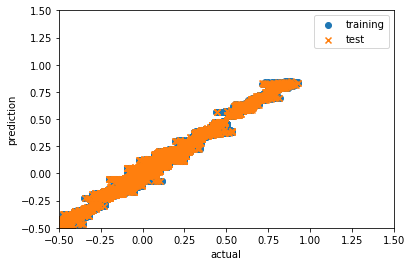

In [19]:
flatten = lambda x, y: list(x) + list(y)


#training
expected = reduce(flatten, dataset.training[1])
actual = reduce(flatten, 
    network.run(
        sess, 
        dataset.training[0]
    )
)

frac  = 1
index = np.arange(int(np.floor(frac * len(actual))))
np.random.shuffle(index)
plt.scatter(np.array(expected)[index], np.array(actual)[index], label="training")

# test dataset
expected = reduce(flatten, dataset.testing[1])
actual = reduce(flatten, 
    network.run(
        sess, 
        dataset.testing[0]
    )
)
plt.scatter(expected,actual, marker="x", label="test")

plt.legend()

lower, upper = -0.5, 1.5
plt.axis([lower, upper, lower, upper])
plt.ylabel("prediction")
plt.xlabel("actual")
plt.show()

### Accumulated test error matrix

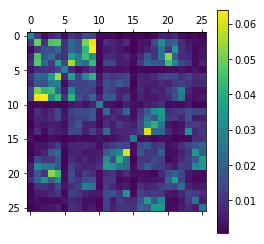

In [20]:
error = np.zeros((dim, dim))
for (x, y) in zip(*dataset.testing):
    x = x.reshape(1, dim**2)
    error += np.abs((y - network.run(sess, x)).reshape(dim, dim))
error /= len(dataset.testing[0])
f = plt.matshow(error)
plt.colorbar(f)
plt.show()

### Iterations

In [8]:
from pyscf.scf import hf

dim = 26

iterations = []
for i, molecule in enumerate(molecules_test):
    
    mol = molecule.get_pyscf_molecule()
    
    
    print("Calculating: " + str(i + 1) + "/" + str(len(molecules_test)))
    
    # assemble pyscf initial guesses
    P_1e = hf.init_guess_by_1e(mol)
    P_atom = hf.init_guess_by_atom(mol)
    P_minao = hf.init_guess_by_minao(mol)
    
    # nn guess
    s = hf.get_ovlp(mol).reshape(1, dim**2)
    s = Dataset.normalize(s, mean=dataset.x_mean, std=dataset.x_std)[0]
    P_NN = network.run(sess, s).reshape(dim, dim).astype('float64')
    
    iterations_molecule = []
    for guess in [P_1e, P_atom, P_minao, P_NN]:
        
        mf = hf.RHF(mol)
        mf.verbose = 1
        mf.kernel(dm0=guess)
        iterations_molecule.append(mf.iterations)
    
    iterations.append(iterations_molecule)

iterations = np.array(iterations)

Calculating: 1/50


Warn: Ipython shell catchs sys.args


Calculating: 2/50


Warn: Ipython shell catchs sys.args


Calculating: 3/50


Warn: Ipython shell catchs sys.args


Calculating: 4/50


Warn: Ipython shell catchs sys.args


Calculating: 5/50


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


Calculating: 6/50
Calculating: 7/50


Warn: Ipython shell catchs sys.args


Calculating: 8/50


Warn: Ipython shell catchs sys.args


Calculating: 9/50


Warn: Ipython shell catchs sys.args


Calculating: 10/50


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


Calculating: 11/50
Calculating: 12/50


Warn: Ipython shell catchs sys.args


Calculating: 13/50


Warn: Ipython shell catchs sys.args


Calculating: 14/50


Warn: Ipython shell catchs sys.args


Calculating: 15/50


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


Calculating: 16/50
Calculating: 17/50


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


Calculating: 18/50
Calculating: 19/50


Warn: Ipython shell catchs sys.args


Calculating: 20/50


Warn: Ipython shell catchs sys.args


Calculating: 21/50


Warn: Ipython shell catchs sys.args


Calculating: 22/50


Warn: Ipython shell catchs sys.args


Calculating: 23/50


Warn: Ipython shell catchs sys.args


Calculating: 24/50


Warn: Ipython shell catchs sys.args


Calculating: 25/50


Warn: Ipython shell catchs sys.args


Calculating: 26/50


Warn: Ipython shell catchs sys.args


Calculating: 27/50


Warn: Ipython shell catchs sys.args


Calculating: 28/50


Warn: Ipython shell catchs sys.args


Calculating: 29/50


Warn: Ipython shell catchs sys.args


Calculating: 30/50


Warn: Ipython shell catchs sys.args


Calculating: 31/50


Warn: Ipython shell catchs sys.args


Calculating: 32/50


Warn: Ipython shell catchs sys.args


Calculating: 33/50


Warn: Ipython shell catchs sys.args


Calculating: 34/50


Warn: Ipython shell catchs sys.args


Calculating: 35/50


Warn: Ipython shell catchs sys.args


Calculating: 36/50


Warn: Ipython shell catchs sys.args


Calculating: 37/50


Warn: Ipython shell catchs sys.args


Calculating: 38/50


Warn: Ipython shell catchs sys.args


Calculating: 39/50


Warn: Ipython shell catchs sys.args


Calculating: 40/50


Warn: Ipython shell catchs sys.args


Calculating: 41/50


Warn: Ipython shell catchs sys.args


Calculating: 42/50


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


Calculating: 43/50
Calculating: 44/50


Warn: Ipython shell catchs sys.args


Calculating: 45/50


Warn: Ipython shell catchs sys.args


Calculating: 46/50


Warn: Ipython shell catchs sys.args


Calculating: 47/50


Warn: Ipython shell catchs sys.args


Calculating: 48/50


Warn: Ipython shell catchs sys.args


Calculating: 49/50


Warn: Ipython shell catchs sys.args


Calculating: 50/50


Warn: Ipython shell catchs sys.args


[12.92  8.78  9.04  9.18]


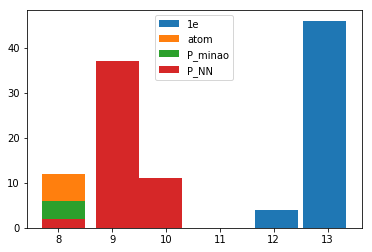

In [9]:
#fig, axes = plt.subplots(2,2)

print(np.mean(iterations,0))

bins = 20 # todo hier kann man auch ein array angeben

for i, name in enumerate(['1e', 'atom', 'P_minao', 'P_NN']):
    
    hist, bins = np.histogram(iterations[:,i])
    center = (bins[:-1] + bins[1:]) / 2
    #axes[i].bar(center, hist, label=name)
    plt.bar(center, hist, label=name)
    
plt.legend()
plt.show()

### Comparing the others against the result
TODO: matrix plot von fehler der jeweiligen initial guesses

In [25]:
from pyscf.scf import hf

dim = 26


number_of_samples = len(S_test)

dP_1e, dP_atom, dP_minao, dP_NN = [np.zeros((dim, dim)) for i in range(4)]
P_1e, P_atom, P_minao, P_expected = [[] for i in range(4)]

for i, (molecule, s, p) in enumerate(zip(molecules_test, S_test, P_test)):
    
    mol = molecule.get_pyscf_molecule()
    
    print("Calculating: " + str(i + 1) + "/" + str(number_of_samples))
    
    # assemble pyscf initial guesses
    P_1e.append(hf.init_guess_by_1e(mol))
    P_atom.append(hf.init_guess_by_atom(mol))
    P_minao.append(hf.init_guess_by_minao(mol))
    
    p = p.reshape(dim, dim)
    P_expected.append(p)
    
    
    # nn guess
    s = Dataset.normalize(s.reshape(1, dim**2), mean=dataset.x_mean, std=dataset.x_std)[0]
    P_NNnetwork.run(sess, s).reshape(dim, dim).astype('float64')
    
    
    # calculate deltas
    dP_1e += np.abs(p - P_1e[-1])
    dP_atom += np.abs(p - P_atom[-1])
    dP_minao += np.abs(p - P_minao[-1])
    dP_NN += np.abs(p - P_NN)
    

    
dP_1e /= number_of_samples
dP_atom /= number_of_samples
dP_minao /= number_of_samples
dP_NN /= number_of_samples

Calculating: 1/50


Warn: Ipython shell catchs sys.args


NameError: name 'P_NNnetwork' is not defined

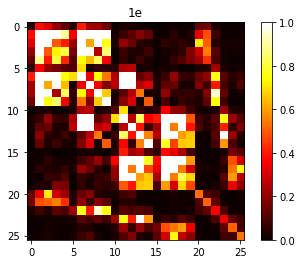

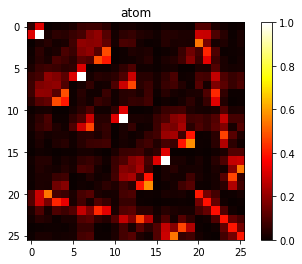

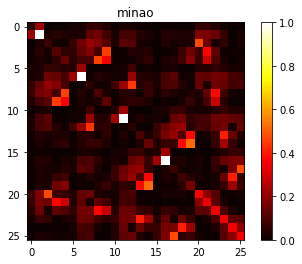

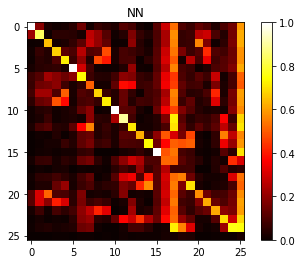

In [23]:
import matplotlib

title = ["1e", "atom", "minao", "NN"]
norm = None
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
for i, error in enumerate([dP_1e, dP_atom, dP_minao, dP_NN]):
    plt.figure()
    img = plt.imshow(error, cmap=plt.get_cmap("hot"), norm=norm)
    plt.colorbar(img)
    plt.title(title[i])
plt.show()   

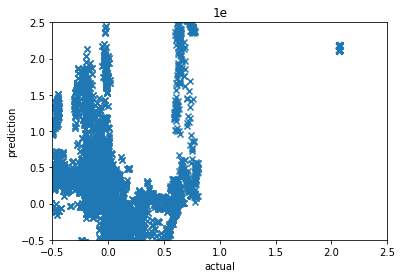

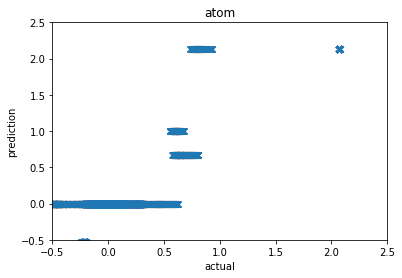

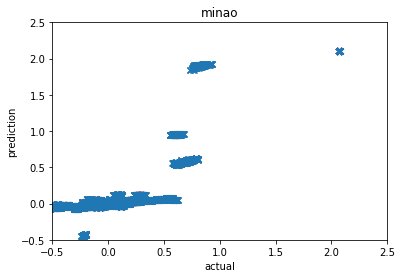

In [12]:
flatten = lambda x, y: list(x) + list(y)

def transform(x):
    return reduce(flatten, map(lambda y: y.flatten(), x))

expected = transform(P_expected)
labels = ["1e", "atom", "minao"]
for i, guess in enumerate(map(transform, [P_1e, P_atom, P_minao])):
    
    fig = plt.figure()
    plt.scatter(expected, guess, marker="x", label="test")
    plt.ylabel("prediction")
    plt.xlabel("actual")
    #plt.axis('equal')
    #plt.set_aspect('equal', 'box')
    lower, upper = -0.5, 2.5
    plt.axis([lower, upper, lower, upper])
    plt.title(labels[i])
    
plt.show()

### Check: was the calculaation consistent?
Comapre newly calculated p vs P_test.

In [13]:
from pyscf.scf import hf

dim = 26

number_of_samples = len(S_test)

dP = np.zeros((dim, dim))

for i, (molecule, p) in enumerate(zip(molecules_test, P_test)):
    
    mol = molecule.get_pyscf_molecule()
    
    print("Calculating: " + str(i + 1) + "/" + str(number_of_samples))
    
    mf = hf.RHF(mol)
    mf.verbose = 1
    mf.kernel()
    
    p = p.reshape(dim, dim)
    
    dP += np.abs(p - mf.make_rdm1())

dP /= number_of_samples


Warn: Ipython shell catchs sys.args


Calculating: 1/50


Warn: Ipython shell catchs sys.args


Calculating: 2/50


Warn: Ipython shell catchs sys.args


Calculating: 3/50


Warn: Ipython shell catchs sys.args


Calculating: 4/50


Warn: Ipython shell catchs sys.args


Calculating: 5/50


Warn: Ipython shell catchs sys.args


Calculating: 6/50


Warn: Ipython shell catchs sys.args


Calculating: 7/50


Warn: Ipython shell catchs sys.args


Calculating: 8/50


Warn: Ipython shell catchs sys.args


Calculating: 9/50


Warn: Ipython shell catchs sys.args


Calculating: 10/50


Warn: Ipython shell catchs sys.args


Calculating: 11/50


Warn: Ipython shell catchs sys.args


Calculating: 12/50


Warn: Ipython shell catchs sys.args


Calculating: 13/50


Warn: Ipython shell catchs sys.args


Calculating: 14/50


Warn: Ipython shell catchs sys.args


Calculating: 15/50


Warn: Ipython shell catchs sys.args


Calculating: 16/50


Warn: Ipython shell catchs sys.args


Calculating: 17/50


Warn: Ipython shell catchs sys.args


Calculating: 18/50


Warn: Ipython shell catchs sys.args


Calculating: 19/50


Warn: Ipython shell catchs sys.args


Calculating: 20/50


Warn: Ipython shell catchs sys.args


Calculating: 21/50


Warn: Ipython shell catchs sys.args


Calculating: 22/50


Warn: Ipython shell catchs sys.args


Calculating: 23/50


Warn: Ipython shell catchs sys.args


Calculating: 24/50


Warn: Ipython shell catchs sys.args


Calculating: 25/50


Warn: Ipython shell catchs sys.args


Calculating: 26/50


Warn: Ipython shell catchs sys.args


Calculating: 27/50


Warn: Ipython shell catchs sys.args


Calculating: 28/50


Warn: Ipython shell catchs sys.args


Calculating: 29/50


Warn: Ipython shell catchs sys.args


Calculating: 30/50


Warn: Ipython shell catchs sys.args


Calculating: 31/50


Warn: Ipython shell catchs sys.args


Calculating: 32/50


Warn: Ipython shell catchs sys.args


Calculating: 33/50


Warn: Ipython shell catchs sys.args


Calculating: 34/50


Warn: Ipython shell catchs sys.args


Calculating: 35/50


Warn: Ipython shell catchs sys.args


Calculating: 36/50


Warn: Ipython shell catchs sys.args


Calculating: 37/50


Warn: Ipython shell catchs sys.args


Calculating: 38/50


Warn: Ipython shell catchs sys.args


Calculating: 39/50


Warn: Ipython shell catchs sys.args


Calculating: 40/50


Warn: Ipython shell catchs sys.args


Calculating: 41/50


Warn: Ipython shell catchs sys.args


Calculating: 42/50


Warn: Ipython shell catchs sys.args


Calculating: 43/50


Warn: Ipython shell catchs sys.args


Calculating: 44/50


Warn: Ipython shell catchs sys.args


Calculating: 45/50


Warn: Ipython shell catchs sys.args


Calculating: 46/50


Warn: Ipython shell catchs sys.args


Calculating: 47/50


Warn: Ipython shell catchs sys.args


Calculating: 48/50


Warn: Ipython shell catchs sys.args


Calculating: 49/50


Warn: Ipython shell catchs sys.args


Calculating: 50/50


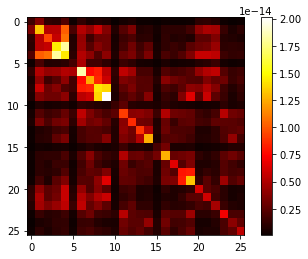

In [14]:
plt.figure()
img = plt.imshow(dP, cmap=plt.get_cmap("hot"))
plt.colorbar(img)
plt.show()   